In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [132]:
df =pd.read_csv("demand_inventory.csv")
df.head(10)

,Unnamed: 0,Date,Product_ID,Demand,Inventory
0,0,2023-06-01,P1,51,5500
1,1,2023-06-02,P1,141,5449
2,2,2023-06-03,P1,172,5308
3,3,2023-06-04,P1,91,5136
4,4,2023-06-05,P1,198,5045
5,5,2023-06-06,P1,70,4847
6,6,2023-06-07,P1,95,4777
7,7,2023-06-08,P1,53,4682
8,8,2023-06-09,P1,136,4629
9,9,2023-06-10,P1,168,4493


The provided dataset contains historical data related to a specific product (Product_ID: P1) over a period of time. The data includes information on the date, product demand, and current inventory levels.

In [134]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Product_ID    0
Demand        0
Inventory     0
dtype: int64

In [135]:
df.dtypes

Unnamed: 0     int64
Date          object
Product_ID    object
Demand         int64
Inventory      int64
dtype: object

In [136]:
# drop the 'Unnamed: 0' column as it is not needed
df.drop(columns=['Unnamed: 0'],inplace= True)

In [137]:
df.head(10)

,Date,Product_ID,Demand,Inventory
0,2023-06-01,P1,51,5500
1,2023-06-02,P1,141,5449
2,2023-06-03,P1,172,5308
3,2023-06-04,P1,91,5136
4,2023-06-05,P1,198,5045
5,2023-06-06,P1,70,4847
6,2023-06-07,P1,95,4777
7,2023-06-08,P1,53,4682
8,2023-06-09,P1,136,4629
9,2023-06-10,P1,168,4493


In [138]:
df['Date']= pd.to_datetime(df['Date'], format='%Y-%m-%d')

#### Demand Over time

Text(0, 0.5, 'Demand')

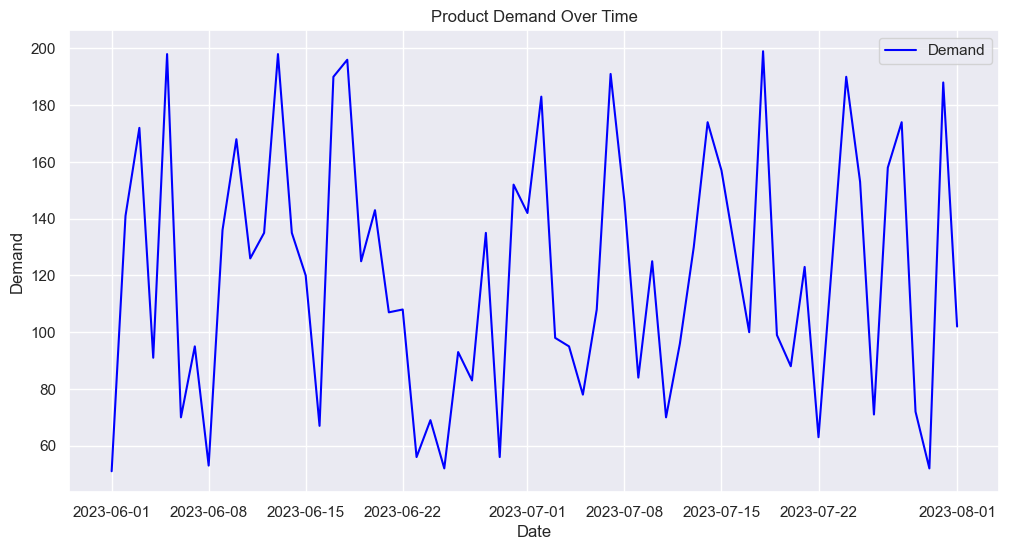

In [139]:
plt.figure(figsize=(12, 6))
sns.lineplot(data =df, x='Date',y='Demand', label='Demand', color='blue')
plt.title("Product Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Demand")



#### Inventory Over Time

Text(0, 0.5, 'Inventory')

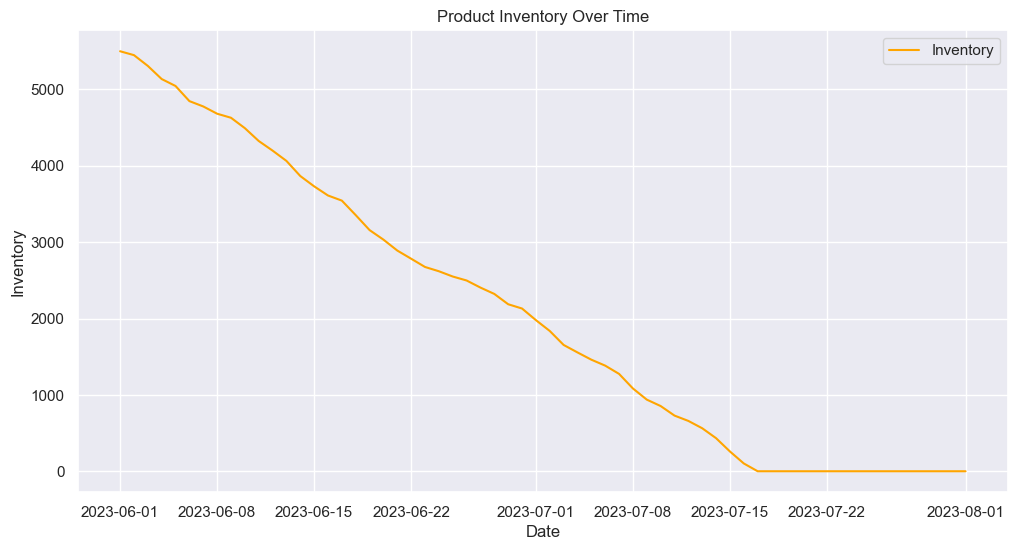

In [140]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Inventory', label='Inventory', color ='orange')
plt.title('Product Inventory Over Time')
plt.xlabel('Date')  
plt.ylabel('Inventory')

Text(0, 0.5, 'Values')

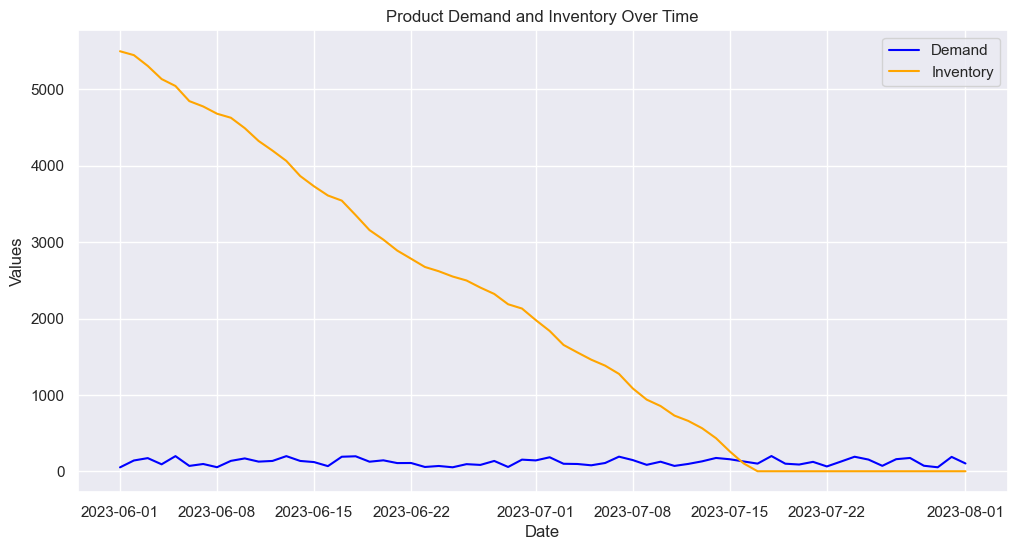

In [141]:
# Plotting both Demand and Inventory on the same graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Demand', label='Demand', color='blue')
sns.lineplot(data=df, x='Date', y='Inventory', label='Inventory', color='orange')   
plt.title('Product Demand and Inventory Over Time')
plt.xlabel('Date')
plt.ylabel('Values')

#### Demand Forecasting

In [142]:
# There is a clear downward trend in inventory over time, with demand fluctuating but generally increasing.
# There is a seasonal pattern in demand, with peaks and troughs that suggest a cyclical nature.

time_series = df.set_index('Date')

# To get more clearer, the data is stationary, we can use the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(time_series['Demand'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# The p-value is less than 0.05, indicating that the time series is stationary.

ADF Statistic: -7.518718190638633
p-value: 3.8413100077967724e-11


P value is greater than 0.05, so data is not stationary. Therefore have to get data difference.

In [143]:
# Due to seasonality, Lets use SARIMA model for forecasting

from statsmodels.tsa.statespace.sarimax import SARIMAX
differenced_time_series = time_series['Demand'].diff().dropna()


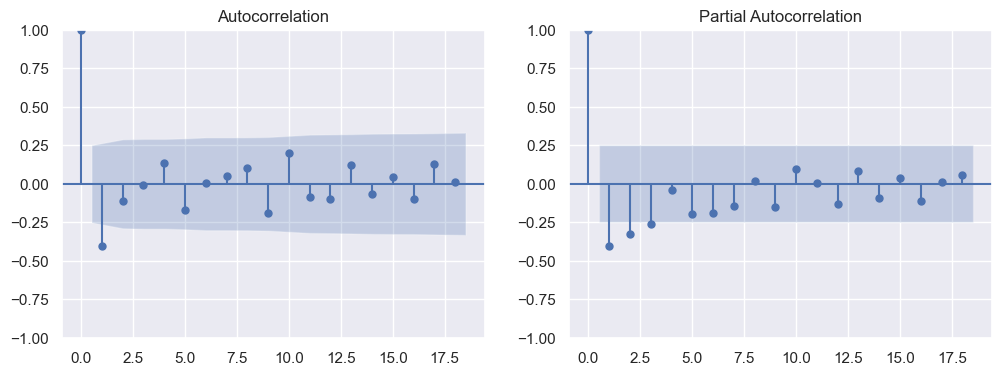

In [144]:
# Plot ACF and PACF of differenced time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_time_series, ax=axes[0])
plot_pacf(differenced_time_series, ax=axes[1])
plt.show()

In [145]:
# p=1, d=1,q=1
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 2)  # Seasonal order for monthly seasonality [#2 because data only avaliable two months period]
model = SARIMAX(time_series['Demand'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

model_fit.summary()


c:\Users\Singer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Singer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            Demand   No. Observations:                   62
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood                -316.472
Date:                           Thu, 12 Jun 2025   AIC                            642.944
Time:                                   15:35:43   BIC                            653.332
Sample:                               06-01-2023   HQIC                           646.999
                                    - 08-01-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1213      0.178      0.680      0.496      -0.228       0.471
ma.L1         -0.9988      7.065     -0.141      0.888     -14.846      12.848
ar.S.L2       -0.1551      0.166     -0.932      0.351      -0.481       0.171
ma.S.L2       -0.8230      0.152     -5.418      0.000      -1.121      -0.525
sigma2      2257.9125   1.58e+04      0.143      0.886   -2.87e+04    3.32e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.35
Prob(Q):                              0.81   Prob(JB):                         0.31
Heteroskedasticity (H):               0.80   Skew:                             0.03
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
future_steps = 10
prediction = model_fit.predict(len(time_series), len(time_series) + future_steps - 1, typ='levels')
prediction =prediction.astype(int)
print(prediction)

2023-08-02    117
2023-08-03    116
2023-08-04    130
2023-08-05    114
2023-08-06    128
2023-08-07    115
2023-08-08    129
2023-08-09    115
2023-08-10    129
2023-08-11    115
Freq: D, Name: predicted_mean, dtype: int32


c:\Users\Singer\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


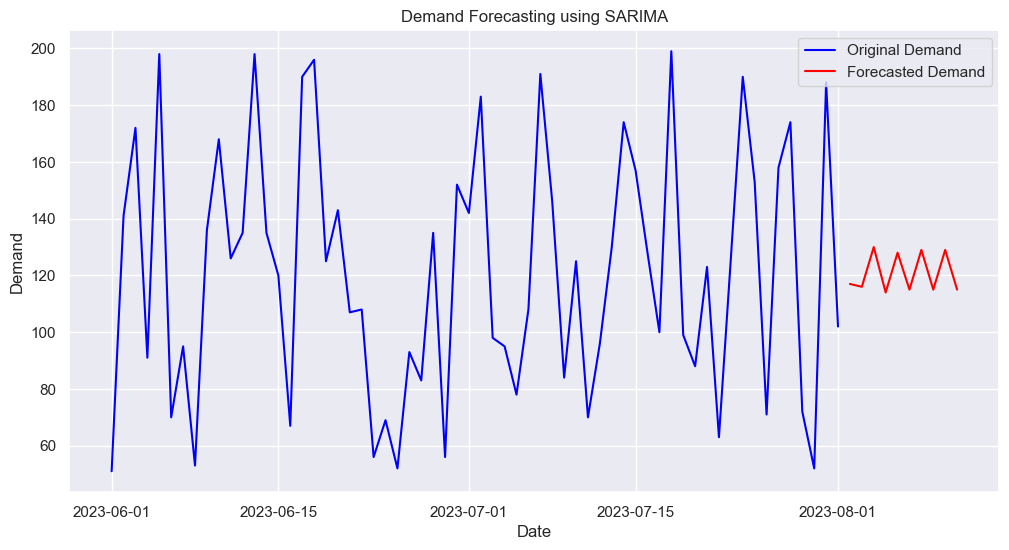

In [147]:
# plot the prediction with the original data
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series['Demand'], label='Original Demand', color='blue')   
plt.plot(pd.date_range(start=time_series.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D'), prediction, label='Forecasted Demand', color='red')
plt.title('Demand Forecasting using SARIMA')    
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [159]:
from scipy.stats import norm
#how we can optimize inventory according to the forecasted demand for the next ten days:
# create indecies for the future predictions
future_dates = pd.date_range(start=time_series.index[-1] + pd.DateOffset(days=1), periods=future_steps, freq='D')
# create a DataFrame for the future predictions 
forecast_demand = pd.Series(prediction, index=future_dates)

#Initial inventory level
initial_inventory = 5500

#Lead Time = (number of days it takes to replenish inventory)
lead_time = 1 #days

#Service Level = (percentage of demand that should be met) - not stockout
service_level = 0.95  # 95% service level

sigma = np.std(time_series['Demand'][-30:],ddof=1)  # Standard deviation of  historical demand

# Calculate the safety stock
safety_stock = sigma * np.sqrt(lead_time)*norm.ppf(service_level)

# Calculate the reorder point
reorder_point = forecast_demand.mean()*lead_time + safety_stock

#Let's assume Order cost per order is $100 and holding cost per unit per year is $10
order_cost = 100  # Cost per order
holding_cost = 10  # Holding cost per unit per year
# Calculate Economic Order Quantity (EOQ)
EOQ = np.sqrt((2 * order_cost * forecast_demand.mean()*365) / holding_cost) # Since we are calculating for a year, we multiply the mean demand by 365





In [160]:
print(f"Safety Stock : {np.ceil(safety_stock)}")
print(f"Reorder Point : {np.ceil(reorder_point)}")
print(f"EOQ : {np.ceil(EOQ)}")


Safety Stock : 71.0
Reorder Point : 192.0
EOQ : 940.0
